In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso # We use LASSO for regression 

In [174]:
# Link for NFL Attendance Data: https://docs.google.com/spreadsheets/d/1DRMB5FLC3tdngeurDwps1CS8-6smEZvmq5R-ghjEv5k/edit#gid=0


#Import NFL Attendance Data using Pandas
attendance_df = pd.read_csv('NFL_Data.csv')

#Lots of NaN values, forward fill in by entry above. 
attendance_df.fillna(method='ffill', inplace = True)
attendance_df


#Import NFL stadium County data, along with Neutral Counties
stadium_county_df = pd.read_csv('Stadium_County.csv',header=1) #Data is a little bit Messy 


#County Covid Rates Provided from NYTIMES Github Database, https://github.com/nytimes/covid-19-data/blob/master/us-counties-2020.csv
county_covid = pd.read_csv('County_Covid_Data.csv')


stadium_county_df['Team '].fillna(method = 'ffill', inplace= True)
county_covid['date'] = pd.to_datetime(county_covid['date'])
county_covid

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0


In [175]:

#We want to associate NFL teams to their respective Counties. Add Column that contains 'HOME COUNTIES', and columns that contains 'NEUTRAL COUNTIES'

attendance_df['Team City'] = attendance_df.Team.str.split().str[:-1].str.join(sep=' ') #To connect with county information


#Change exceptions with 2 name cities



def find_stadium_counties(team_city_str):
    team_city_data = stadium_county_df.loc[stadium_county_df['Team '] == team_city_str]
    team_city_data = team_city_data[team_city_data['County(s)'].notnull()]
    
    #Take away counties that don't belong in home state
    home_state = list(team_city_data['State'])[0]
    team_city_data = team_city_data[team_city_data['State.1'] == home_state]
    
    return list(set(team_city_data['County(s)']))

def find_neutral_counties(team_city_str):
    team_city_data = stadium_county_df.loc[stadium_county_df['Team '] == team_city_str]
    team_city_data = team_city_data[team_city_data['Counties'].notnull()]
    
    
    #Take away counties that don't belong in home state
    if(len(list(team_city_data['State'])) > 0): #If a home state exists... some not included in data set
        home_state = list(team_city_data['State'])[0]
        team_city_data = team_city_data[team_city_data['State.1'] == home_state]
    
    return list(set(team_city_data['Counties']))
    

attendance_df['Stadium_Counties'] = attendance_df['Team City'].apply(find_stadium_counties)
attendance_df['Neutral_Counties'] = attendance_df['Team City'].apply(find_neutral_counties)
                
attendance_df.tail(50)




,Team,Stadium capacity,Date of home games,Opponent,Attendance,% Capacity,Unnamed: 6,Team City,Stadium_Counties,Neutral_Counties
102,Jacksonville Jaguars,67858.0,12/13,Tennessee,15896,23.4%,NaN,Jacksonville,[Duval],"[Seminole, Clay, Orange, HIllsborough, Saint J..."
103,Jacksonville Jaguars,67858.0,12/27,Chicago,17445,25.7%,NaN,Jacksonville,[Duval],"[Seminole, Clay, Orange, HIllsborough, Saint J..."
104,Kansas City Chiefs,76416.0,9/10,Houston,15895,20.8%,NaN,Kansas City,[],"[Sedgwick, Shawnee, Wyandotte]"
105,Kansas City Chiefs,76416.0,10/5,New England,12729,16.7%,NaN,Kansas City,[],"[Sedgwick, Shawnee, Wyandotte]"
106,Kansas City Chiefs,76416.0,10/11,Las Vegas,13311,17.4%,NaN,Kansas City,[],"[Sedgwick, Shawnee, Wyandotte]"
107,Kansas City Chiefs,76416.0,11/1,NY Jets,11932,15.6%,NaN,Kansas City,[],"[Sedgwick, Shawnee, Wyandotte]"
108,Kansas City Chiefs,76416.0,11/8,Carolina,12073,15.8%,NaN,Kansas City,[],"[Sedgwick, Shawnee, Wyandotte]"
109,Kansas City Chiefs,76416.0,12/6,Denver,12578,16.5%,NaN,Kansas City,[],"[Sedgwick, Shawnee, Wyandotte]"
110,Kansas City Chiefs,76416.0,12/27,Atlanta,13470,17.6%,NaN,Kansas City,[],"[Sedgwick, Shawnee, Wyandotte]"
111,Kansas City Chiefs,76416.0,1/3,LA Chargers,13240,17.3%,NaN,Kansas City,[],"[Sedgwick, Shawnee, Wyandotte]"


In [176]:
hamilton_data = county_covid[(county_covid['county'] == 'Hamilton') & (county_covid['state'] == 'Ohio')]

hamilton_data

,date,county,state,fips,cases,deaths
4935,2020-03-19,Hamilton,Ohio,39061.0,2,0.0
5798,2020-03-20,Hamilton,Ohio,39061.0,7,0.0
6798,2020-03-21,Hamilton,Ohio,39061.0,8,0.0
7908,2020-03-22,Hamilton,Ohio,39061.0,19,0.0
9111,2020-03-23,Hamilton,Ohio,39061.0,26,0.0
...,...,...,...,...,...,...
870601,2020-12-27,Hamilton,Ohio,39061.0,49823,411.0
873846,2020-12-28,Hamilton,Ohio,39061.0,49961,411.0
877091,2020-12-29,Hamilton,Ohio,39061.0,50527,411.0
880336,2020-12-30,Hamilton,Ohio,39061.0,51124,413.0


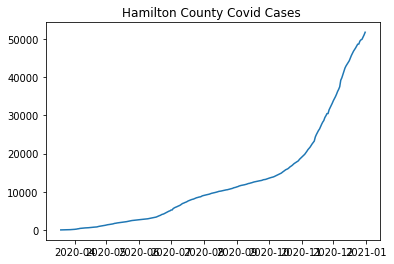

In [177]:
#Observe same data as Hamilton before, now we need to add Synthetic control data. 
plt.plot(hamilton_data['date'], hamilton_data['cases'])
plt.title("Hamilton County Covid Cases ")
plt.show()

In [178]:
#Want to construct synthetic control for Hamilton County after Cincinnati NFL game at 10/4

#First, we gain the list of synthetic counties to use 
cincinnati_synthetic_counties = list(attendance_df.loc[attendance_df['Team'] == 'Cincinnati Bengals']['Neutral_Counties'])[0]

cincinnati_synthetic_counties

['Greene', 'Butler', 'Warren', 'Clermont', 'Franklin', 'Montgomery']

In [196]:
#Now, we want to construct a synthetic control with the above counties, using LASSO regression.

#Followed similar steps from above article: https://towardsdatascience.com/causal-inference-with-synthetic-control-in-python-4a79ee636325



#Data doesn't exist for some counties before 3/20, so we'll use data after that
Y = hamilton_data.loc[hamilton_data['date'] < '2020-10-04']
Y = Y.loc[Y['date'] > '2020-03-20']

#X is county covid results for synthetic counties before 2020-10-04
X = county_covid[(county_covid['county'].isin(cincinnati_synthetic_counties)) & (county_covid['date'] < '2020-10-04')]

#Data doesn't exist for some counties before 3/20, so we'll use data after that
X = X.loc[X['date'] > '2020-03-20']


#X = X[['date', 'county', 'cases']]

#We need to create a pivot table with cases, date, and county
X_pivot = X.pivot_table(columns='county', values = 'cases',index = 'date')


Y_pivot = Y.pivot_table(columns='county', values='cases', index='date')

Lasso_weights = Lasso(fit_intercept=False, normalize=True, tol = 0.005).fit(X_pivot, Y_pivot).coef_

Lasso_weights.round(3)


array([10.169,  1.932,  0.72 , -8.177,  0.92 , -0.055])

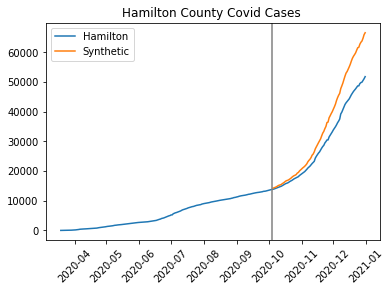

In [211]:
#Now, with these Lasso Weights we perform a dot product on the synthetic controls to create our Synthetic Variable. 


#Create synthetic for post NFL opening dates in data
X_post = county_covid[(county_covid['county'].isin(cincinnati_synthetic_counties)) & (county_covid['date'] > '2020-10-04')]

X_post_pivot = X_post.pivot_table(columns='county', values = 'cases',index = 'date')

Y_post = hamilton_data.loc[hamilton_data['date'] > '2020-10-04']

Y_post_pivot = Y_post.pivot_table(columns='county', values = 'cases',index = 'date')


Hamilton_synthetic = X_post_pivot.dot(Lasso_weights)

#Plot Hamilton_synthetic along with actual Hamilton data past 10/4 results. 

plt.plot(hamilton_data['date'], hamilton_data['cases'], label='Hamilton')
plt.plot(Hamilton_synthetic, label='Synthetic')
plt.xticks(rotation=45)
plt.title("Hamilton County Covid Cases ")
#plt.tick_params(axis='x', which='major')
plt.xticks()
plt.axvline(x=pd.Timestamp("2020-10-04"), ymin = 0, ymax = 1, color='grey')
#plt.gcf().autofmt_xdate()

plt.legend()
plt.show()
#X_post_pivot

In [217]:
#Make earlier process into a function to generalize to other Stadiums

def create_synthetic_graph(team_name_str, stadium_county_str, state_str):
    stadium_county_data = county_covid[(county_covid['county'] == stadium_county_str) & (county_covid['state'] == state_str)]
    synthetic_counties = list(attendance_df.loc[attendance_df['Team'] == team_name_str]['Neutral_Counties'])[0]
    
    
    #Data doesn't exist for some counties before 3/20, so we'll use data after that
    Y = stadium_county_data.loc[stadium_county_data['date'] < '2020-10-04']
    Y = Y.loc[Y['date'] > '2020-03-20']

    #X is county covid results for synthetic counties before 2020-10-04
    X = county_covid[(county_covid['county'].isin(synthetic_counties)) & (county_covid['date'] < '2020-10-04')]

    #Data doesn't exist for some counties before 3/20, so we'll use data after that
    X = X.loc[X['date'] > '2020-03-20']


    #X = X[['date', 'county', 'cases']]

    #We need to create a pivot table with cases, date, and county
    X_pivot = X.pivot_table(columns='county', values = 'cases',index = 'date')


    Y_pivot = Y.pivot_table(columns='county', values='cases', index='date')

    Lasso_weights = Lasso(fit_intercept=False, normalize=True, tol = 0.005).fit(X_pivot, Y_pivot).coef_

    Lasso_weights.round(3)
    
    X_post = county_covid[(county_covid['county'].isin(synthetic_counties)) & (county_covid['date'] > '2020-10-04')]

    X_post_pivot = X_post.pivot_table(columns='county', values = 'cases',index = 'date')

    Y_post = stadium_county_data.loc[stadium_county_data['date'] > '2020-10-04']

    Y_post_pivot = Y_post.pivot_table(columns='county', values = 'cases',index = 'date')


    Synthetic_results = X_post_pivot.dot(Lasso_weights)

    #Plot Hamilton_synthetic along with actual Hamilton data past 10/4 results. 

    plt.plot(stadium_county_data['date'], stadium_county_data['cases'], label= stadium_county_str)
    plt.plot(Synthetic_results, label='Synthetic')
    plt.xticks(rotation=45)
    plt.title(stadium_county_str + " County Covid Cases ")
    #plt.tick_params(axis='x', which='major')
    plt.xticks()
    plt.axvline(x=pd.Timestamp("2020-10-04"), ymin = 0, ymax = 1, color='grey')
    #plt.gcf().autofmt_xdate()

    plt.legend()
    plt.show()

    

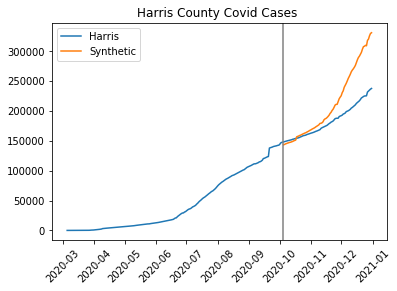

In [218]:
create_synthetic_graph("Houston Texans","Harris", "Texas")